<table>
    <tr>
        <td><img src="https://s3.amazonaws.com/media-p.slid.es/uploads/1485763/images/9060062/Header.png" width="300"/></td>
        <td>&nbsp;</td>
        <td>
            <h1 style="font-size:200%;color:blue;text-align:center">    <FONT COLOR="blue">  Estudio de Caso 1  </FONT>         </h1></td>         
        <td>
            <tp><p style="font-size:99%;text-align:center">PLN </p></tp>
            <tp><p style="font-size:115%;text-align:center">Pregrado MACC 2023-2</p></tp>
            <tp><p style="font-size:115%;text-align:center">Prof. Fabián Sánchez</p></tp>
        </td>
    </tr>
</table>

**Integrantes: Laura González, Nicolas Dussan y Dafne Castellanos**

# <FONT SIZE=5 COLOR="green"> **Objetivo del estudio de caso y resultados de aprendizaje** </FONT>

En este estudio de caso se espera que el estudiante aplique los conceptos vistos en la primera parte del curso. Particularmente.

- Cargar y explorar datos estructurados que incluyen cadenas de texto.

- Aplicar las técnicas de limpieza para normalizar un texto.

- Reconocer los elementos de la creación de una bolsa de palabras por vectorización con frecuencias y con **TF-iDF**.

- Aplicar Naive-Bayes para problemas de clasificación y comparar los resultados de NB con otros algoritmos.

- Aplicar lo anterior para hacer análisis de sentimientos.

# <FONT SIZE=5 COLOR="green"> **Indicaciones** </FONT>

- Para entregar en grupos de máximo tres integrantes.

- Cargar en la plataforma *e-aulas* los archivos: *.ipynb* y *.pdf*

- Fecha de entrega el día **jueves 31 de julio antes de las 6:00 p.m.**

### Carga de Librerias Necesarias

In [2]:
!pip install stop-words

  Preparing metadata (setup.py) ... done
  Created wheel for stop-words: filename=stop_words-2018.7.23-py3-none-any.whl size=32896 sha256=f604357ee8da11b85ef5a0c1d59f4fea779f08c416afc1c5d317ff189a29a2a1
  Stored in directory: /root/.cache/pip/wheels/d0/1a/23/f12552a50cb09bcc1694a5ebb6c2cd5f2a0311de2b8c3d9a89
Successfully built stop-words


In [1]:
#
import pandas as pd
import re
import nltk
from stop_words import get_stop_words
import pickle

#
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

# Utilizar 'notebook' para html o 'colab'
import plotly.io as pio
pio.renderers.default='notebook'

#
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, f1_score

ModuleNotFoundError: ignored

In [ ]:
nltk.download("all")

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   U

True

# <FONT SIZE=5 COLOR="bronw"> **Punto 1. Carga y Exploración de los datos** </FONT>

Considere la siguiente base donde se reportan comentarios en Twitter de productos de Apple.

"https://raw.githubusercontent.com/Fabian830348/Bases_Datos/master/tweets.csv"

1. Cargue los datos y haga una breve descripción de estos. Cambie el nombre de las columnas por otros más cortos.

In [ ]:
url="https://raw.githubusercontent.com/Fabian830348/Bases_Datos/master/tweets.csv"
datos=pd.read_csv(url)
datos = datos.rename(columns={"tweet_text":"tweet","emotion_in_tweet_is_directed_at":"product","is_there_an_emotion_directed_at_a_brand_or_product":"emotion"})
datos.head()

,tweet,product,emotion
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


En la anterior tabla podemos evidenciar la estructura de la base de datos, esta incluye tres columnas:


1.   Tweet: los tweets con las opiniones de los productos.
2.   Product: los productos mencionados en los tweets.
3.   Emotion: si las emociones hacia los productos son positivas, negativas, si no tienen emoción asociada a al producto o si se abstiene de decir alguna emoción.




2. En la columna de *emotions* agrupe solamente en tres categorias: *positivos*, *neutros* y *negativos*. Haga la tabla de frecuencias.

In [ ]:
datos["emotion"] = datos["emotion"].replace({'No emotion toward brand or product':'neutral', 'I can\'t tell':'neutral','Negative emotion':'negative','Positive emotion':'positive'})

In [ ]:
datos.head(1)

,tweet,product,emotion
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,negative


In [ ]:
datos["emotion"].value_counts()

neutral     5545
positive    2978
negative     570
Name: emotion, dtype: int64

Al analizar las frecuencias de las emociones, se destaca que la opinión neutral es predominante, con un total de 5545 personas, seguido por 2978 personas que experimentan emociones positivas, mientras que 570 personas presentan emociones negativas.

3. ¿Cuál es el top 5 de los usuarios (@) y de los hashtag (#)?
### Usuarios top 5

In [ ]:
# Encontrar los usuarios en un tweet
patron_1 = r'(@\w{2,})'
list_user = []

for i in range(len(datos)):
  if datos.tweet[i] == None:
    continue
  elif not isinstance(datos.tweet[i], str):
        continue
  elif re.findall(patron_1, datos.tweet[i]) == ['']:
    continue
  else:
    list_user.append(re.findall(patron_1, datos.tweet[i]))

In [ ]:
# Aplanamos la lista de usuarios
list_user_f = []
for i in list_user:
  list_user_f += i

# Obtenemos las frecuencias de la repetición de usuarios
freq_user =nltk.FreqDist(list_user_f)

In [ ]:
df_user = pd.DataFrame([[key, freq_user[key]] for key in freq_user.keys()], columns=['Palabra', 'Frecuencia'])
df_top_user = df_user.sort_values("Frecuencia", ascending=False)

In [ ]:
df_top_user.head(5)

,Palabra,Frecuencia
23,@mention,7110
7,@madebymany,5
44,@Schmittastic,3
24,@garyvee,3
27,@mentionc,2


Los cinco usuarios que reciben más menciones en los tweets son: @mention (7110), @madebymnay (5), @Schmittastic (3), @garyvee (3) y @mentionc (2). De lo anterior, podemos extraer dos observaciones clave con respecto a las menciones en tweets de los usuarios mencionados:

1. Se puede observar una disparidad significativa en la distribución de menciones entre estos usuarios. Mientras que @mention lidera con un considerable total de 7110 menciones, los demás usuarios presentan cifras considerablemente más bajas en términos de menciones recibidas.
2. La notable cantidad de menciones dirigidas al usuario @mention (7110) sugiere que este usuario podría ejercer una influencia destacada o ser altamente relevante en la comunidad de usuarios que participan en la generación de estos tweets.

### Hashtag

In [ ]:
# Encontrar los hashtags en un tweet

patron_2 = r'(#\w{2,})'
list_topic = []

for i in range(len(datos)):
  if datos.tweet[i] == None:
    continue
  elif not isinstance(datos.tweet[i], str):
        continue
  elif re.findall(patron_2, datos.tweet[i]) == ['']:
    continue
  else:
    list_topic.append(re.findall(patron_2, datos.tweet[i]))

In [ ]:
# Aplanamos la lista de topics
list_topic_f = []
for i in list_topic:
  list_topic_f += i

# Obtenemos las frecuencias de la repetición de topics
freq_topic =nltk.FreqDist(list_topic_f)

In [ ]:
# Obtenemos la tabla de frecuencias del top 10 de topics
df_user = pd.DataFrame([[key, freq_topic[key]] for key in freq_topic.keys()], columns=['Palabra', 'Frecuencia'])
df_top_user = df_user.sort_values("Frecuencia", ascending=False)
df_top_user.head(5)

,Palabra,Frecuencia
3,#sxsw,4544
1,#SXSW,4375
47,#Apple,245
13,#iPhone,215
38,#sxswi,209


Los cinco temas tendencia más mencionados en los tweets son: #sxsw (4544), #SXSW (4375), #Apple (245), #iPhone (215) y #sxswi (209).


4. Haga una nube de palabras con los hashtag.

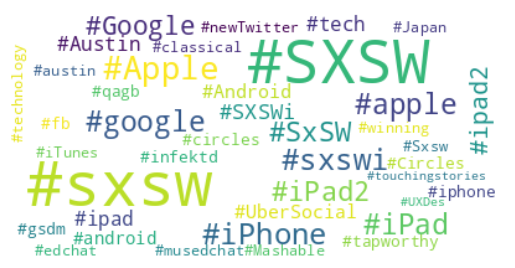

In [ ]:
wordcloud = WordCloud(max_font_size=50,
                      max_words=40,
                      background_color="white",
                      colormap = "viridis").generate_from_frequencies(freq_topic)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

En el análisis de la nube de palabras, es evidente que los términos más recurrentes son #sxsw y #SXSW. Sin embargo, estos elementos por sí solos no proporcionan una comprensión profunda de los temas presentes en el conjunto de datos. Al examinar con mayor detalle, se destacan menciones relacionadas con Google, Apple, iPhone, iPad, iPad2 y términos como "tech". A partir de esto, se podría inferir que el conjunto de datos se centra en temas relacionados con tecnología, en particular las marcas Apple y Google y sus productos.

Adicionalmente, es evidente la relevancia de llevar a cabo la normalización y el proceso de limpieza del texto, ya que se pueden identificar hashtags que se repiten, pero algunos de ellos están escritos en minúscula mientras que otros están en mayúscula.


5. Realice un gráfico de barras de la variable: producto evaluado (columna 2). Analice.

In [ ]:
px.bar(datos["product"].value_counts(),title="Recuento de la cantidad del producto")

En el gráfico de barras, se destaca que el producto más mencionado es el iPad, seguido por Apple, iPhone o aplicaciones para iPhone, y Google. Por otro lado, marcas como Android y otros productos o servicios de Apple tienen una presencia menos frecuente. Esto sugiere que los comentarios se centran mayormente en el iPad y los productos de Apple. Estos patrones podrían indicar que la población de la que se tomaron los tweets tiende a utilizar más productos de Apple que de Android.

Sin embargo, es crucial señalar que todavía no disponemos de información acerca de las emociones asociadas con los productos de Apple en los tweets. Para obtener conclusiones más sólidas, sería necesario profundizar en el análisis de los datos y determinar si las menciones a los productos de Apple están acompañadas de emociones positivas, negativas o neutrales.


6. ¿Cuál producto tiene más comentarios positivos? ¿negativos?

In [ ]:
product_counts = datos["product"].value_counts()

# Crear una lista para almacenar los datos de cada emoción
data_list = []

# Iterar a través de cada producto y agregar los recuentos de emociones a data_list
for product in product_counts.index:
    emotion_counts = datos[datos["product"] == product]["emotion"].value_counts()
    for emotion, count in emotion_counts.items():
        data_list.append({"product": product, "emotion": emotion, "count": count})

# Crear un DataFrame a partir de la lista de datos
data_df = pd.DataFrame(data_list)

# Crear el gráfico de barras agrupado por producto y emoción
fig = px.bar(data_df, x="product", y="count", color="emotion", title="Recuentos de Emociones por Producto")

fig.show()

Dado que el iPad es el producto con la mayor cantidad de comentarios en su totalidad, resulta lógico que sus comentarios positivos (793), negativos (125) o neutrales (28) sean los más numerosos. No obstante, es evidente que el iPhone, con un total de 297 reseñas, tiene una proporción considerablemente alta de comentarios negativos, registrando 103 en total. Asimismo, observamos un patrón similar en los comentarios positivos de otros productos de Google: con un total de 293 opiniones, 236 de ellas son positivas.

# <FONT SIZE=5 COLOR="bronw"> **Punto 2. Normalización** </FONT>

Aplique los conceptos de normalización vistos en clase para hacer la limpieza de los datos. Por ejemplo,

- Preprocesamiento de los datos
- Pasar a minúscula
- Eliminar algunos signos, quitar los *@* y *#*.
- Eliminar stop words, etc.

Recuerde que la normalización no es estándar y depende del contexto de los datos y queda a discreción de la persona que analiza la información.

- Guarde el procesamiento en un archivo ***.pickle***. Despues, puede importar este archivo y evita que tenga que volver a ejecutar el procesamiento, lo cual ahorra tiempo. (trabajo de consulta cómo hacerlo)


---



Primero, realizaremos la normalización con la función definida el taller pasado CleanPLN.

In [ ]:
def cleanPLN(texto, idioma = "es"):
  # Pasar a minusculas
  texto = texto.lower()
  # Remover caracteres especiales y tildes
  texto = re.sub(r'[á]+', 'a', texto)
  texto = re.sub(r'[é]+', 'e', texto)
  texto = re.sub(r'[í]+', 'i', texto)
  texto = re.sub(r'[ó]+', 'o', texto)
  texto = re.sub(r'[úü]+', 'u', texto)
  texto = re.sub(r'[^A-Za-z\s]+', '', texto)
  texto = texto.replace('@', '').replace('#', '')
  # Tokenizar
  tokens = nltk.word_tokenize(texto)
  # Eliminar las stop.words y Dejar palabras con más de 3 caracteres
  stop_words=get_stop_words(idioma)
  tokens_clean = [palabras for palabras in tokens if len(palabras)>3 and (palabras not in stop_words)]
  # Regrese la cadena de texto simplificada.
  texto_limpio = ' '.join(tokens_clean)
  return texto_limpio

Aplicamos la limpieza para todos los datos.

In [ ]:
datos['tweet'] = datos['tweet'].astype(str)
datos['tweet'] = datos['tweet'].apply(lambda x: cleanPLN(x,"en"))

Guardamos los datos limpios en un pickle.

In [ ]:
with open('datos_limpios.pickle', 'wb') as f:
    pickle.dump(datos, f)

In [ ]:
with open('datos_limpios.pickle', 'rb') as f:
    datos_normalizados = pickle.load(f)

Visualizamos los datos visualizados para evidenciar que la liempieza se haya aplicado de forma correcta.

In [ ]:
datos_normalizados.head()

,tweet,product,emotion
0,wesley iphone tweeting riseaustin dead need up...,iPhone,negative
1,jessedee know fludapp awesome ipadiphone youll...,iPad or iPhone App,positive
2,swonderlin wait ipad also sale sxsw,iPad,positive
3,sxsw hope years festival isnt crashy years iph...,iPad or iPhone App,negative
4,sxtxstate great stuff sxsw marissa mayer googl...,Google,positive


# <FONT SIZE=5 COLOR="bronw"> **Punto 3. Modelos de Machine Learning** </FONT>

Aplicar los siguientes modelos de ML teniendo en cuenta

a) **vectorización con frecuencias**. CountVectorizer

b) **TF-iDF**. Tf+idfVectorizer

Para este último tener el cuenta las 1000 palabras más frecuentes y las palabras que aparezcan mínimo en 3 documentos.

Con cada uno de las vectorizaciones aplicar los siguientes modelos
  
  - Naive Bayes: Bernoulli

  - Naive Bayes: Multinomial

  - Regresión logística

  - Otro método de libre elección por el estudiante

Guarde el entrenamiento de los modelos en archivos ***.pickle***.



---



Para poder utilizar los modelos y predecir valores categóricos, es necesario convertir la variable objetivo en variables numericas mediante la técnica de "Label Encoding". En este caso, se ajusta un codificador a los valores únicos de una columna de un marco de datos, y luego se transforma la columna con el codificador para asignar un valor numérico único a cada etiqueta.


**Las categorías quedaran de la siguiente forma:**

- 0 para Negativo
- 1 para Neutro
- 2 para Positivo

In [ ]:
# Convertir las emociones en variables numéricas
le = LabelEncoder()
le.fit(datos['emotion'])

datos['emotion'] = le.transform(datos['emotion'])
datos.head()

,tweet,product,emotion
0,wesley iphone tweeting riseaustin dead need up...,iPhone,0
1,jessedee know fludapp awesome ipadiphone youll...,iPad or iPhone App,2
2,swonderlin wait ipad also sale sxsw,iPad,2
3,sxsw hope years festival isnt crashy years iph...,iPad or iPhone App,0
4,sxtxstate great stuff sxsw marissa mayer googl...,Google,2


In [ ]:
# Dividir los datos en conjunto de entrenamiento y de test
X_train, X_test, y_train, y_test = train_test_split(datos[['tweet']],
                                                    datos[['emotion']],
                                                    random_state=0)
print('Número de filas total base: {}'.format(datos.shape[0]))
print('Número de filas conjunto de entrenamiento: {}'.format(X_train.shape[0]))
print('Número de filas conjunto de prueba: {}'.format(X_test.shape[0]))

Número de filas total base: 9093
Número de filas conjunto de entrenamiento: 6819
Número de filas conjunto de prueba: 2274


In [ ]:
# Definir las vectorizaciones
count_vectorizer = CountVectorizer()
tfidf_vectorizer = TfidfVectorizer(max_features=1000, min_df=3)

In [ ]:
# Aplicar las vectorizaciones a los datos de entrenamiento
X_train_count = count_vectorizer.fit_transform(X_train['tweet'])
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train['tweet'])

# Aplicar las vectorizaciones a los datos de prueba
X_test_count = count_vectorizer.transform(X_test['tweet'])
X_test_tfidf = tfidf_vectorizer.transform(X_test['tweet'])

In [ ]:
# Guardar los vectorizadores en un archivo pickle
with open('vectorizers.pickle', 'wb') as f:
    pickle.dump((count_vectorizer, tfidf_vectorizer), f)

**Elección del cuarto modelo**

Optamos por emplear una red neuronal MLPClassifier como nuestro enfoque elegido. Esta elección se basa en varias consideraciones. Primordialmente, las MLP ofrecen flexibilidad para aprender características complejas y no lineales a partir de los datos, lo que permite capturar matices y relaciones sutiles en el lenguaje de los tweets, fundamental en el análisis de sentimientos. Asimismo, el MLPClassifier puede generalizar patrones del conjunto de entrenamiento, lo que es crucial para clasificar nuevos datos en el procesamiento de lenguaje natural, dada la variabilidad lingüística y estructural. Dado que los comentarios en redes sociales varían ampliamente en longitud, estructura y expresión, las redes neuronales MLP sobresalen por su habilidad para adaptarse a esta diversidad de entrada.

In [ ]:
# Definir los modelos de clasificación
models = {
    "Bernoulli-Naive-Bayes": BernoulliNB(),
    "Multinomial-Naive-Bayes": MultinomialNB(),
    "Logistic-Regression": LogisticRegression(max_iter=1000),
    "Neural-Network": MLPClassifier(max_iter=1000)
}

In [ ]:
# Entrenar CountVectorizer con los modelos y guardarlo en un .pickle
for model_name, model in models.items():
  # Entrenar el modelo
  model.fit(X_train_count, y_train)
  # Guardar el modelo en un archivo pickle
  filename = f"CountVectorizer_{model_name}.pickle"
  with open(filename, 'wb') as file:
    pickle.dump(model, file)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



In [ ]:
# Entrenar TfidfVectorizer con los modelos y guardarlo en un .pickle
for model_name, model in models.items():
  # Entrenar el modelo
  model.fit(X_train_tfidf, y_train)
  # Guardar el modelo en un archivo pickle
  filename = f"TfidfVectorizer_{model_name}.pickle"
  with open(filename, 'wb') as file:
    pickle.dump(model, file)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



# <FONT SIZE=5 COLOR="bronw"> **Punto 4. Evaluación y comparación de los Modelos** </FONT>

En este punto se evaluarán los modelos entrenados en el punto anterior.

1. Hacer las matrices de confusión de cada uno de los modelos.

2. Hacer una tabla de resumen de las métricas de los modelos. Una con la vectorización por frecuencia y otra con **TF-iDF**. La tabla debe contener en filas los métodos aplicados y en columnas las métricas así:
*accuracy_train* | *accuracy_test* | *recall_train*| *recall_test*|f1_train|f1_test|

3. Hacer gráficos de barras: uno por cada métrica, en filas los algoritmos aplicados y en la altura la comparación del valor en *train* y *test*.

4. Genere un par de tweets y clasifíquelos usando el mejor modelo encontrado.  

### Evaluación de Modelos

In [ ]:
# Carga de Modelos
count_files = [
    "CountVectorizer_Bernoulli-Naive-Bayes.pickle",
    "CountVectorizer_Multinomial-Naive-Bayes.pickle",
    "CountVectorizer_Logistic-Regression.pickle",
    "CountVectorizer_Neural-Network.pickle"
]
tfidf_files = [
    "TfidfVectorizer_Bernoulli-Naive-Bayes.pickle",
    "TfidfVectorizer_Multinomial-Naive-Bayes.pickle",
    "TfidfVectorizer_Logistic-Regression.pickle",
    "TfidfVectorizer_Neural-Network.pickle"
]

In [ ]:
# Definir las métricas a calcular
metrics = {
    'accuracy': accuracy_score,
    'recall': recall_score,
    'f1': f1_score
}

In [ ]:
# Inicializar los resultados
results_list = []

In [ ]:
# Evaluar cada modelo para CountVectorizer
for model_name in count_files:
  with open(model_name, 'rb') as f:
    model = pickle.load(f)
  # Predecir etiquetas
  y_train_pred = model.predict(X_train_count)
  y_test_pred = model.predict(X_test_count)
  # Calcular métricas
  train_metrics_values = [
      accuracy_score(y_train, y_train_pred),
      recall_score(y_train, y_train_pred, average='weighted'),
      f1_score(y_train, y_train_pred, average='weighted')
  ]
  test_metrics_values = [
      accuracy_score(y_test, y_test_pred),
      recall_score(y_test, y_test_pred, average='weighted'),
      f1_score(y_test, y_test_pred, average='weighted')
  ]
  print(f"{model_name} \n Train \n{train_metrics_values} \n Test\n{test_metrics_values} \n Pred Values \n{y_test_pred}")
  # Agregar resultados a la lista
  results_list.append(["CountVectorizer", model_name] + train_metrics_values + test_metrics_values)

CountVectorizer_Bernoulli-Naive-Bayes.pickle 
 Train 
[0.7977709341545681, 0.7977709341545681, 0.7733582382525702] 
 Test
[0.6781002638522428, 0.6781002638522428, 0.6408472351842446] 
 Pred Values 
[1 2 1 ... 2 1 1]
CountVectorizer_Multinomial-Naive-Bayes.pickle 
 Train 
[0.8284205895292565, 0.8284205895292565, 0.822757845943109] 
 Test
[0.6750219876868954, 0.6750219876868954, 0.6551843741106359] 
 Pred Values 
[2 2 1 ... 2 0 2]
CountVectorizer_Logistic-Regression.pickle 
 Train 
[0.9030649655374688, 0.9030649655374688, 0.9015042289051991] 
 Test
[0.693051890941073, 0.693051890941073, 0.6782784114531248] 
 Pred Values 
[2 2 1 ... 2 1 2]
CountVectorizer_Neural-Network.pickle 
 Train 
[0.9891479689103975, 0.9891479689103975, 0.9891463447818009] 
 Test
[0.6525945470536499, 0.6525945470536499, 0.6493304646648806] 
 Pred Values 
[2 2 1 ... 2 1 2]


In [ ]:
# Evaluar cada modelo para TfidfVectorizer
for model_name in tfidf_files:
  with open(model_name, 'rb') as f:
    model = pickle.load(f)

  # Predecir etiquetas
  y_train_pred = model.predict(X_train_tfidf)
  y_test_pred = model.predict(X_test_tfidf)

  # Calcular métricas
  train_metrics_values = [
      accuracy_score(y_train, y_train_pred),
      recall_score(y_train, y_train_pred, average='weighted'),
      f1_score(y_train, y_train_pred, average='weighted')
  ]
  test_metrics_values = [
      accuracy_score(y_test, y_test_pred),
      recall_score(y_test, y_test_pred, average='weighted'),
      f1_score(y_test, y_test_pred, average='weighted')
  ]
  print(f"{model_name} \n Train \n{train_metrics_values} \n Test\n{test_metrics_values} \n Pred Values \n{y_test_pred}")
  # Agregar resultados a la lista
  results_list.append(["TfidfVectorizer", model_name] + train_metrics_values + test_metrics_values)

TfidfVectorizer_Bernoulli-Naive-Bayes.pickle 
 Train 
[0.7081683531309576, 0.7081683531309576, 0.7062865976628278] 
 Test
[0.6591908531222516, 0.6591908531222516, 0.6556370573153405] 
 Pred Values 
[1 2 1 ... 2 2 2]
TfidfVectorizer_Multinomial-Naive-Bayes.pickle 
 Train 
[0.7064085643056166, 0.7064085643056166, 0.6662805295792245] 
 Test
[0.6710642040457344, 0.6710642040457344, 0.6245754033078829] 
 Pred Values 
[1 2 1 ... 2 2 2]
TfidfVectorizer_Logistic-Regression.pickle 
 Train 
[0.7364716234051913, 0.7364716234051913, 0.711460641837822] 
 Test
[0.6811785400175902, 0.6811785400175902, 0.6531381838557452] 
 Pred Values 
[1 2 1 ... 2 2 2]
TfidfVectorizer_Neural-Network.pickle 
 Train 
[0.9769760962017892, 0.9769760962017892, 0.9769119887699448] 
 Test
[0.6517150395778364, 0.6517150395778364, 0.6467208446929072] 
 Pred Values 
[2 2 1 ... 2 2 2]


In [ ]:
# Crear un DataFrame para los resultados
columns = ['Vectorization', 'Model'] + [f'{metric}_train' for metric in metrics.keys()] + [f'{metric}_test' for metric in metrics.keys()]
results = pd.DataFrame(results_list)
results = results.rename(columns=dict(zip(results.columns.tolist(), columns)))
results.head(8)

,Vectorization,Model,accuracy_train,recall_train,f1_train,accuracy_test,recall_test,f1_test
0,CountVectorizer,CountVectorizer_Bernoulli-Naive-Bayes.pickle,0.797771,0.797771,0.773358,0.678100,0.678100,0.640847
1,CountVectorizer,CountVectorizer_Multinomial-Naive-Bayes.pickle,0.828421,0.828421,0.822758,0.675022,0.675022,0.655184
2,CountVectorizer,CountVectorizer_Logistic-Regression.pickle,0.903065,0.903065,0.901504,0.693052,0.693052,0.678278
3,CountVectorizer,CountVectorizer_Neural-Network.pickle,0.989148,0.989148,0.989146,0.652595,0.652595,0.649330
4,TfidfVectorizer,TfidfVectorizer_Bernoulli-Naive-Bayes.pickle,0.708168,0.708168,0.706287,0.659191,0.659191,0.655637
5,TfidfVectorizer,TfidfVectorizer_Multinomial-Naive-Bayes.pickle,0.706409,0.706409,0.666281,0.671064,0.671064,0.624575
6,TfidfVectorizer,TfidfVectorizer_Logistic-Regression.pickle,0.736472,0.736472,0.711461,0.681179,0.681179,0.653138
7,TfidfVectorizer,TfidfVectorizer_Neural-Network.pickle,0.976976,0.976976,0.976912,0.651715,0.651715,0.646721


### Matrices de Confusión

1. Realizamos las matrices de confusión para cada uno de los modelos.


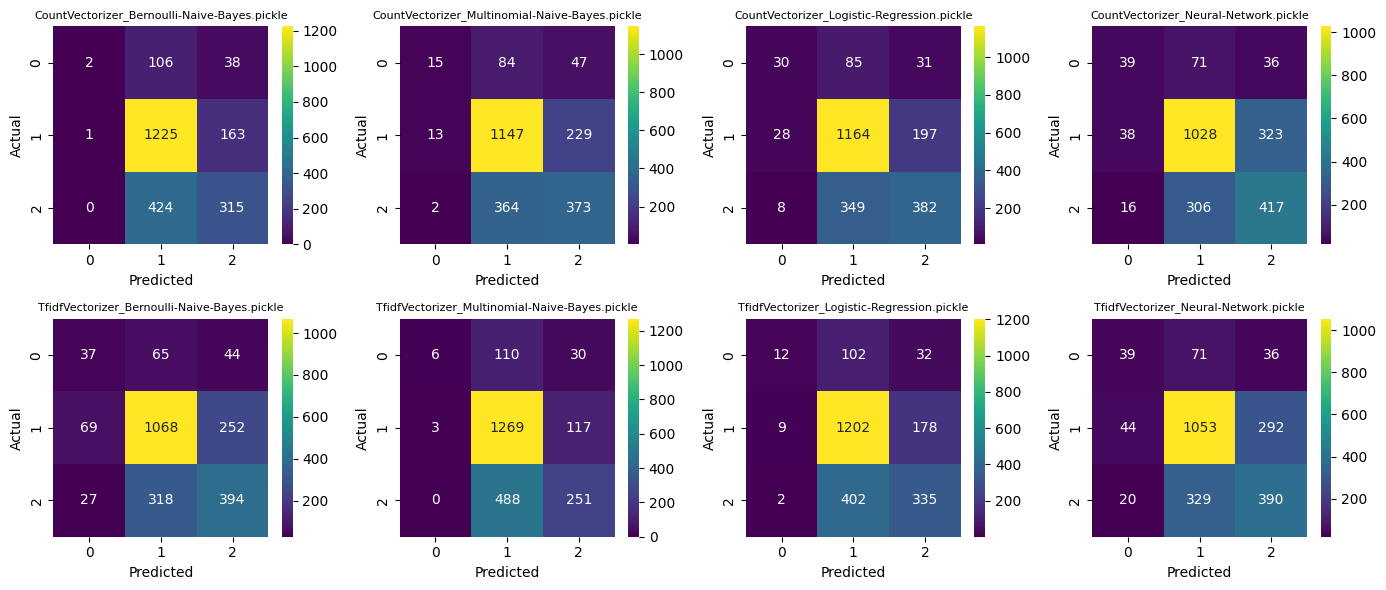

In [ ]:
# Código para iterar a través de los resultados y dibujar las gráficas
fig, axes = plt.subplots(2, 4, figsize=(14, 6))
fig.subplots_adjust(hspace=0.4)

for i, row in results.iterrows():
    vec_name = row['Vectorization']
    model_file = row['Model']

    with open(model_file, 'rb') as f:
        model = pickle.load(f)
    if row["Vectorization"] == "CountVectorizer":
        y_pred = model.predict(X_test_count)
    else:
        y_pred = model.predict(X_test_tfidf)

    cm = confusion_matrix(y_test, y_pred)

    row_idx = i // 4  # Fila correspondiente en la cuadrícula
    col_idx = i % 4   # Columna correspondiente en la cuadrícula

    ax = axes[row_idx, col_idx]
    sns.heatmap(cm, annot=True, fmt='d', cmap='viridis', ax=ax)
    ax.set_title(model_file, fontsize=8)
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')

plt.tight_layout()
plt.show()

### Tablas de resumen


2. Generamos una tabla de resumen que incluye las métricas de los modelos, diferenciando entre la vectorización por frecuencia y la vectorización por TF-iDF. La tabla está organizada con los métodos utilizados en las filas y las métricas en las columnas de la siguiente manera:
*accuracy_train* | *accuracy_test* | *recall_train*| *recall_test*|f1_train|f1_test|

Para CountVectorizer

In [ ]:
results[results['Vectorization'] == 'CountVectorizer'].iloc[:, 1:]

,Model,accuracy_train,recall_train,f1_train,accuracy_test,recall_test,f1_test
0,CountVectorizer_Bernoulli-Naive-Bayes.pickle,0.797771,0.797771,0.773358,0.678100,0.678100,0.640847
1,CountVectorizer_Multinomial-Naive-Bayes.pickle,0.828421,0.828421,0.822758,0.675022,0.675022,0.655184
2,CountVectorizer_Logistic-Regression.pickle,0.903065,0.903065,0.901504,0.693052,0.693052,0.678278
3,CountVectorizer_Neural-Network.pickle,0.989148,0.989148,0.989146,0.652595,0.652595,0.649330


Podemos evidenciar que el accuracy de test para el modelo con CountVectorizer y Naive Bayes es de un 67%, su recall es de 67% y su F1-score es de 64%.

Podemos evidenciar que el accuracy de test para el modelo con CountVectorizer y Multinomial Naive Bayes es de un 67%, su recall es de 67% y su F1-score es de 65%.

Podemos evidenciar que el accuracy de test para el modelo con CountVectorizer y Regresión logística es de un 69%, su recall es de 69% y su F1-score es de 67%.

Podemos evidenciar que el accuracy de test para el modelo con CountVectorizer y la red neuronal es de un 65%, su recall es de 65% y su F1-score es de 64%.

Para TfidfVectorizer

In [ ]:
results[results['Vectorization'] == 'TfidfVectorizer'].iloc[:, 1:]

,Model,accuracy_train,recall_train,f1_train,accuracy_test,recall_test,f1_test
4,TfidfVectorizer_Bernoulli-Naive-Bayes.pickle,0.708168,0.708168,0.706287,0.659191,0.659191,0.655637
5,TfidfVectorizer_Multinomial-Naive-Bayes.pickle,0.706409,0.706409,0.666281,0.671064,0.671064,0.624575
6,TfidfVectorizer_Logistic-Regression.pickle,0.736472,0.736472,0.711461,0.681179,0.681179,0.653138
7,TfidfVectorizer_Neural-Network.pickle,0.976976,0.976976,0.976912,0.651715,0.651715,0.646721


Podemos evidenciar que el accuracy de test para el modelo con TfidfVectorizer y Naive Bayes es de un 65%, su recall es de 65% y su F1-score es de 65%.

Podemos evidenciar que el accuracy de test para el modelo con TfidfVectorizer y Multinomial Naive Bayes es de un 67%, su recall es de 67% y su F1-score es de 62%.

Podemos evidenciar que el accuracy de test para el modelo con TfidfVectorizer y Regresión logística es de un 68%, su recall es de 68% y su F1-score es de 65%.

Podemos evidenciar que el accuracy de test para el modelo con TfidfVectorizer y la red neuronal es de un 65%, su recall es de 65% y su F1-score es de 64%.

### Gráficos de Barras


3. Creamos gráficos de barras para cada métrica, con una representación para cada algoritmo aplicado. En el eje vertical se muestra la comparación entre los valores en train y test.

In [ ]:
for metric in metrics:
    fig_train = px.bar(results, x='Model', y=f'{metric}_train', color='Vectorization', title=f'{metric.capitalize()} Comparison (Train)')
    #fig_train.update_xaxes(tickfont=dict(size=6))
    fig_train.show()

    fig_test = px.bar(results, x='Model', y=f'{metric}_test', color='Vectorization', title=f'{metric.capitalize()} Comparison (Test)')
    #fig_train.update_xaxes(tickfont=dict(size=6))
    fig_test.show()

### Pruebas con tweets



4. Generamos un par de tweets y los clasificamos utilizando el mejor modelo que encontramos.

In [ ]:
filas = 5
aleatorios = datos.sample(filas)
aleatorios.head(filas)

,tweet,product,emotion
7228,jealous people ipad take photos iwantacameraon...,iPad,2
4303,nice mention apple open popup store sxsw festi...,NaN,2
7974,still tweetie running leopard pariah sxsw wish...,Android,2
5088,mention mention apple ipad popup store mention...,NaN,1
11,find start impromptu parties sxsw hurricanepar...,Android App,2


In [ ]:
aleatorios.reset_index(drop=True, inplace=True)
aleatorios.head(filas)

,tweet,product,emotion
0,jealous people ipad take photos iwantacameraon...,iPad,2
1,nice mention apple open popup store sxsw festi...,NaN,2
2,still tweetie running leopard pariah sxsw wish...,Android,2
3,mention mention apple ipad popup store mention...,NaN,1
4,find start impromptu parties sxsw hurricanepar...,Android App,2


In [ ]:
with open(count_files[2], 'rb') as f:
    best_model = pickle.load(f)

In [ ]:
tweets_vectorized = count_vectorizer.transform(aleatorios['tweet'])

In [ ]:
predictions = best_model.predict(tweets_vectorized)

In [ ]:
for i in range(len(aleatorios)):
  print(f"Tweet: {aleatorios['tweet'][i]} \n Predicción: {predictions[i]} \t Real: {aleatorios['emotion'][i]}")

Tweet: jealous people ipad take photos iwantacameraonmyipad sxsw 
 Predicción: 2 	 Real: 2
Tweet: nice mention apple open popup store sxsw festival link sxsw ipad 
 Predicción: 2 	 Real: 2
Tweet: still tweetie running leopard pariah sxsw wish least android something make cool 
 Predicción: 2 	 Real: 2
Tweet: mention mention apple ipad popup store mention sxsw like cross emergency tent hipsters publicradio 
 Predicción: 1 	 Real: 1
Tweet: find start impromptu parties sxsw hurricaneparty httpbitlygvlrin cant wait android comes 
 Predicción: 2 	 Real: 2


# <FONT SIZE=5 COLOR="bronw"> **Punto 5. Conclusiones** </FONT>

**Conclusiones sobre los resultados obtenidos:**

Las conclusiones obtenidas de nuestro análisis en la clasificación de tweets utilizando diferentes modelos y técnicas de vectorización son las siguientes:

1. **Modelo Naive Bayes con CountVectorizer:**
   - El modelo presenta un rendimiento consistente en términos de accuracy, recall y F1-Score, todos en torno al 67%.
   - Dado que las tres métricas tienen valores similares, es probable que el modelo esté equilibrado en términos de precisión y capacidad para capturar ejemplos positivos.

2. **Modelo Multinomial Naive Bayes con CountVectorizer:**
   - Similar al modelo Naive Bayes, este también muestra resultados coherentes con un accuracy, recall y F1-Score en el rango del 67-65%.
   - Este modelo puede ser ligeramente más capaz de distinguir entre las clases neutras y positivas, ya que su F1-Score es un poco más alto que el del modelo anterior.

3. **Modelo Regresión Logística con CountVectorizer:**
   - El modelo muestra un aumento en el rendimiento con un accuracy de prueba del 69%, un recall del 69% y un F1-Score del 67%.
   - Estos resultados indican una mejora en la precisión y la capacidad para capturar ejemplos positivos en comparación con los modelos anteriores.

4. **Modelo de Red Neuronal con CountVectorizer:**
   - Aunque presenta una precisión algo más baja en comparación con otros modelos, con un accuracy del 65%, mantiene recall y F1-Score similares alrededor del 65-64%.
   - El rendimiento de este modelo podría estar afectado por factores como el tamaño del conjunto de datos o la configuración de la red neuronal.

En general, podemos concluir que, para este problema de clasificación de tweets, la Regresión Logística con CountVectorizer se destaca por ofrecer un mejor equilibrio entre precisión y capacidad para identificar ejemplos positivos. Sin embargo, todas las métricas y modelos presentan valores relativamente cercanos, lo que indica que cada modelo tiene un desempeño razonable en esta tarea. Es importante continuar ajustando y evaluando los modelos para encontrar el mejor equilibrio en términos de rendimiento y generalización.


Basándonos en los resultados obtenidos para la clasificación de tweets utilizando diferentes modelos y la técnica de vectorización TF-IDF, podemos extraer las siguientes conclusiones:

1. **Modelo Naive Bayes con TfidfVectorizer:**
   - El modelo presenta un rendimiento coherente en términos de accuracy, recall y F1-Score, todos alrededor del 65%.
   - Al igual que en el caso de CountVectorizer, el modelo demuestra un equilibrio entre precisión y la capacidad para capturar ejemplos positivos.

2. **Modelo Multinomial Naive Bayes con TfidfVectorizer:**
   - El accuracy de prueba del modelo es ligeramente superior al 65%, con un recall similar.
   - Sin embargo, su F1-Score disminuye a 62%, lo que sugiere que el modelo puede tener dificultades en equilibrar la precisión y la captura de ejemplos positivos.

3. **Modelo Regresión Logística con TfidfVectorizer:**
   - El modelo registra un aumento en el rendimiento en comparación con el modelo Multinomial Naive Bayes, con un accuracy de prueba del 68% y un recall del 68%.
   - El F1-Score también aumenta a 65%, lo que indica un mejor equilibrio entre precisión y recall en comparación con el modelo anterior.

4. **Modelo de Red Neuronal con TfidfVectorizer:**
   - Al igual que en el caso de CountVectorizer, el modelo de red neuronal muestra una precisión un poco más baja, con un accuracy del 65%.
   - Aunque su rendimiento es sólido, podría beneficiarse de ajustes en la configuración para lograr un mejor equilibrio en las métricas.

En resumen, al utilizar la técnica de vectorización TF-IDF, observamos resultados similares en términos de rendimiento a los obtenidos con CountVectorizer. La Regresión Logística con TfidfVectorizer parece ser la opción más sólida en términos de equilibrio entre precisión y recall. Aunque las diferencias entre modelos y métricas no son muy grandes, estos resultados sugieren que ajustes finos y optimizaciones podrían llevar a un mejor rendimiento general. Continuar experimentando con diferentes modelos y parámetros puede ser beneficioso para mejorar aún más el rendimiento del modelo en la clasificación de tweets.

Así mismo, elegimos el modelo de Regresión Logística como el mejor por estas razones:

El modelo de Regresión Logística se destaca como el mejor en este caso debido a varias razones basadas en los resultados y en el análisis de las métricas de evaluación:

1. **Equilibrio en Métricas:** El modelo de Regresión Logística con TfidfVectorizer logra un buen equilibrio entre las métricas clave de evaluación, incluyendo accuracy, recall y F1-Score. Este equilibrio es crucial, ya que indica que el modelo es capaz de realizar clasificaciones precisas y al mismo tiempo capturar ejemplos positivos de manera efectiva.

2. **Precision y Recall Mejorados:** El modelo de Regresión Logística logra un aumento en el F1-Score y en el recall en comparación con otros modelos. Esto sugiere que el modelo tiene la capacidad de identificar y clasificar correctamente ejemplos positivos (tweets positivos) mientras mantiene una precisión razonable.

3. **Consistencia en Rendimiento:** El modelo de Regresión Logística con TfidfVectorizer exhibe resultados coherentes en todas las métricas evaluadas, con un accuracy del 68%, un recall del 68% y un F1-Score del 65%. Esta consistencia indica que el modelo está equilibrando eficazmente la precisión y la captura de ejemplos positivos.

4. **Utilización de TfidfVectorizer:** El uso de la técnica de vectorización TF-IDF en combinación con Regresión Logística ha demostrado ser eficaz en este escenario de clasificación de tweets. TF-IDF permite ponderar las palabras según su importancia en los documentos, lo que puede ser beneficioso en el análisis de texto.

5. **Generalización Adecuada:** Aunque los resultados son del conjunto de pruebas, el hecho de que el modelo de Regresión Logística con TfidfVectorizer muestre un buen rendimiento en todas las métricas sugiere que tiene la capacidad de generalizar bien a datos nuevos y no vistos.


**Conclusiones sobre la actividad:**

En el proceso de realizar modelos para la clasificación de tweets y evaluar sus métricas, hemos obtenido valiosas conclusiones que enriquecen nuestra comprensión de cómo abordar tareas de procesamiento de lenguaje natural y análisis de sentimientos en el contexto de redes sociales. Algunas de las principales lecciones aprendidas son las siguientes:

1. Hemos comprendido la necesidad de una preparación adecuada de los datos antes de construir modelos. La limpieza de texto, la tokenización y la selección de técnicas de vectorización (como CountVectorizer y TfidfVectorizer) son pasos fundamentales para representar los textos en un formato adecuado para el modelado.

2. A través de la comparación de varios modelos, como Naive Bayes, Regresión Logística y Redes Neuronales, hemos aprendido que diferentes algoritmos tienen sus propias fortalezas y debilidades. Identificar el modelo más adecuado para una tarea específica depende de las características de los datos y las métricas de evaluación deseadas.

3. Hemos adquirido un conocimiento profundo sobre cómo interpretar métricas clave como accuracy, recall y F1-Score. Estas métricas nos proporcionan información sobre el rendimiento general del modelo, su capacidad para capturar ejemplos positivos y su equilibrio entre precisión y recall.

# <FONT SIZE=5 COLOR="bronw"> **Punto 6. Bibliografía** </FONT>

Datacamp. (2023). Python Pickle Tutorial with plk. Www.datacamp.com. https://www.datacamp.com/tutorial/pickle-python-tutorial

Deng and Liu. (2018) Deep Learning in Natural Language Processing. Springer Nature Singapore Pte Ltd.

NLTK. (2009). Natural Language Toolkit — NLTK 3.4.4 documentation. Nltk.org. https://www.nltk.org/

Scikit-learn. (2019). scikit-learn: machine learning in Python — scikit-learn 0.20.3 documentation. Scikit-Learn.org. https://scikit-learn.org/stable/index.html

Pedregosa, F., Varoquaux, G., Gramfort, A., Michel, V., Thirion, B., Grisel, O., Blondel, M., Prettenhofer, P., Weiss, R., Dubourg, V., Vanderplas, J., Passos, A., Cournapeau, D., Brucher, M., Perrot, M., & Duchesnay, E. (2011). Scikit-learn: Machine Learning in Python. Journal of Machine Learning Research, 12, 2825-2830.

Perkins, H. & Joshi, C. (2016). Natural Language Processing: Python and NLTK. Packt Publishing Ltd.


In [3]:
%%shell
jupyter nbconvert --to html /content/Caso1_PLN_Final.ipynb

[NbConvertApp] Converting notebook /content/Caso1_PLN_Final.ipynb to html
[NbConvertApp] Writing 1149579 bytes to /content/Caso1_PLN_Final.html
